<img src='image/22.png' style="zoom:40%">

# 1.画散点图

In [12]:
x<-c(1,2,3,4,5)
y<-c(10,10,20,20,40)

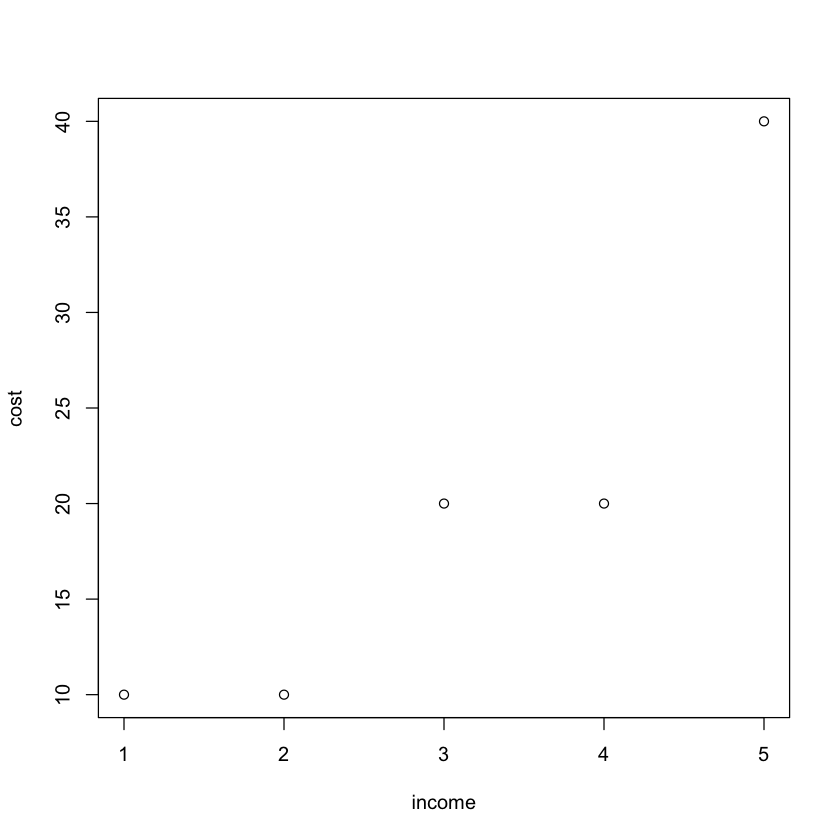

In [13]:
plot(x,y,xlab="income",ylab="cost")

# 2.x与y之间是否大致呈线性关系

In [14]:
cor(x,y)  #计算x和y的相关系数

[1] 0.9036961

$x$与$y$大致呈线性关系

# 3.用最小二乘估计求出回归方程

In [15]:
model<-lm(y~x) 
model


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
         -1            7  


回归方程为$\hat{y}=7x-1$

# 4.求回归标准误差

In [16]:
se <- summary(model)$sigma
se

[1] 6.055301

# 5.给出$\hat{\beta_0}$和$\hat{\beta_1}$的置信度为95%的区间估计

In [17]:
confint(model)

,2.5 %,97.5 %
(Intercept),-21.2112485,19.21125
x,0.9060793,13.09392


$\hat{\beta_0}$的置信度为95%的区间估计为-21.211到19.211

$\hat{\beta_1}$的置信度为95%的区间估计为0.906到13.0939


# 6.计算$x$与$y$的决定系数

In [18]:
r_squared<-summary(model)$r.squared  #计算决定系数R平方
r_squared

[1] 0.8166667

# 7.对回归方程做方差分析

In [19]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,490,490.00000,13.36364,0.03535285
Residuals,3,110,36.66667,NA,NA


# 8.做回归系数$\beta_1$的显著性检验

In [20]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
         1          2          3          4          5 
 4.000e+00 -3.000e+00 -3.775e-15 -7.000e+00  6.000e+00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -1.000      6.351  -0.157   0.8849  
x              7.000      1.915   3.656   0.0354 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.055 on 3 degrees of freedom
Multiple R-squared:  0.8167,	Adjusted R-squared:  0.7556 
F-statistic: 13.36 on 1 and 3 DF,  p-value: 0.03535


$\beta_1$的估计值是7.000，标准误差是1.915，t统计量是3.656，P值是0.0354

# 9.做相关系数的显著性检验

In [21]:
cor.test(x, y)


	Pearson's product-moment correlation

data:  x and y
t = 3.6556, df = 3, p-value = 0.03535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1057216 0.9936915
sample estimates:
      cor 
0.9036961 


P值为0.03535，小于显著性水平（如0.05），拒绝原假设，可以认为$x$和$y$之间的相关系数是显著不为零

# 10.对回归方程做残差图并做相应的分析

In [22]:
# 获取残差
e <- resid(model)

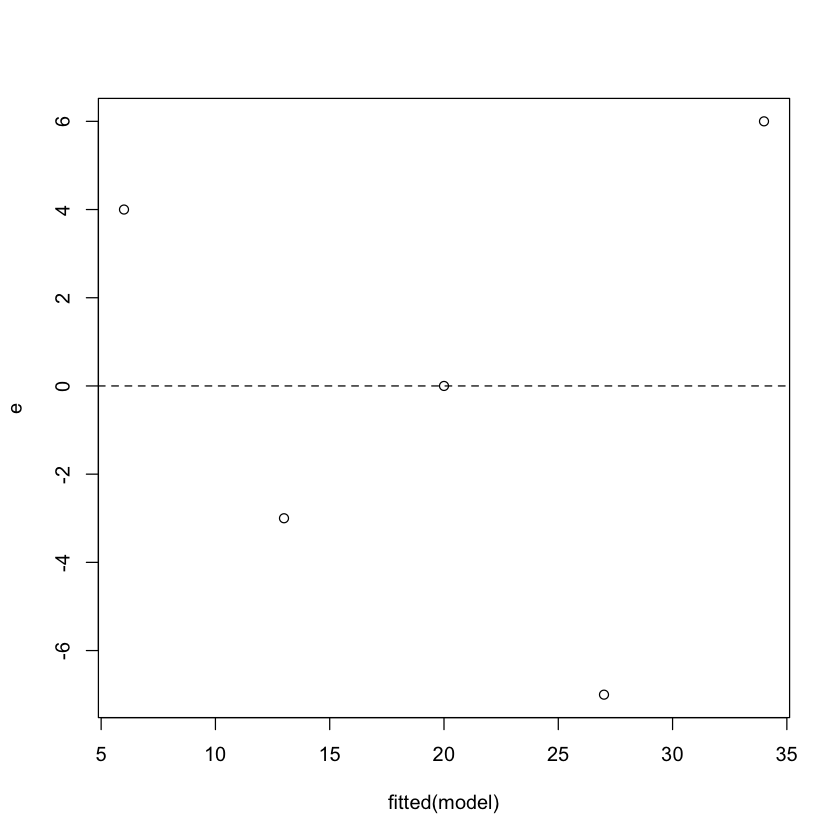

In [23]:
plot(fitted(model), e)
abline(h = 0, lty = 2) # 添加一条水平参考线

# 11.求广告费用为4.2万元时，销售收入将达到多少，并给出置信度为95%的置信区间

In [24]:
new_x <- 4.2

# 使用predict()函数计算预测值和置信区间
prediction <- predict(model, newdata = data.frame(x = new_x), interval = "confidence", level = 0.95)
prediction

,fit,lwr,upr
1,28.4,17.09746,39.70254


当广告费用为4.2万元时，根据回归模型预测，销售收入的预测值为28.4，并且在95%的置信度下，认为真实值会在17.097到39.702的区间内